참고 : https://github.com/tomsharp/SVR/blob/master/SVR.ipynb

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv("data/Boston Housing Prices.csv")
df.describe()
len(df)

numeric_data = df.select_dtypes(include=['float64', 'int64'])
numeric_data.corr()

tract   longitude    latitude       crime  residential  \
count   506.000000  506.000000  506.000000  506.000000   506.000000   
mean   2700.355731  -71.056389   42.216440    3.613524    11.363636   
std    1380.036830    0.075405    0.061777    8.601545    23.322453   
min       1.000000  -71.289497   42.029999    0.006320     0.000000   
25%    1303.250000  -71.093226   42.180774    0.082045     0.000000   
50%    3393.500000  -71.052902   42.218100    0.256510     0.000000   
75%    3739.750000  -71.019625   42.252249    3.677083    12.500000   
max    5082.000000  -70.809998   42.381000   88.976196   100.000000   

       industrial         nox       rooms       older    distance     highway  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    11.136779    0.554695    6.284634   68.574901    3.795043    9.549407   
std      6.860353    0.115878    0.702617   28.148862    2.105710    8.707259   
min      0.460000    0.385000    3.561000    2.900000    1.129600    1.000000   
25%      5.190000    0.449000    5.885500   45.025000    2.100175    4.000000   
50%      9.690000    0.538000    6.208500   77.500000    3.207450    5.000000   
75%     18.100000    0.624000    6.623500   94.074999    5.188425   24.000000   
max     27.740000    0.871000    8.780000  100.000000   12.126500   24.000000   

              tax     ptratio       lstat       cmedv  
count  506.000000  506.000000  506.000000  506.000000  
mean   408.237154   18.455534   12.653063   22.528854  
std    168.537116    2.164946    7.141062    9.182176  
min    187.000000   12.600000    1.730000    5.000000  
25%    279.000000   17.400000    6.950000   17.025000  
50%    330.000000   19.050000   11.360000   21.200001  
75%    666.000000   20.200001   16.954999   25.000000  
max    711.000000   22.000000   37.970001   50.000000

506

tract  longitude  latitude     crime  residential  industrial  \
tract        1.000000  -0.220890 -0.225543 -0.547165     0.367292   -0.575705   
longitude   -0.220890   1.000000  0.143055  0.065101    -0.218080    0.062702   
latitude    -0.225543   0.143055  1.000000 -0.084294    -0.129668   -0.041093   
crime       -0.547165   0.065101 -0.084294  1.000000    -0.200469    0.406583   
residential  0.367292  -0.218080 -0.129668 -0.200469     1.000000   -0.533828   
industrial  -0.575705   0.062702 -0.041093  0.406583    -0.533828    1.000000   
nox         -0.569807   0.160869 -0.068600  0.420972    -0.516604    0.763651   
rooms        0.305207  -0.257111 -0.069317 -0.219247     0.311991   -0.391676   
older       -0.487465   0.204736  0.079035  0.352734    -0.569537    0.644779   
distance     0.496841  -0.011241 -0.082981 -0.379670     0.664408   -0.708027   
highway     -0.828829   0.034065 -0.207013  0.625505    -0.311948    0.595129   
tax         -0.793602   0.050661 -0.167718  0.582764    -0.314563    0.720760   
ptratio     -0.532678   0.312602 -0.004527  0.289946    -0.391679    0.383248   
lstat       -0.522485   0.195629  0.045660  0.455621    -0.412995    0.603800   
cmedv        0.428252  -0.322947  0.006825 -0.389582     0.360386   -0.484754   

                  nox     rooms     older  distance   highway       tax  \
tract       -0.569807  0.305207 -0.487465  0.496841 -0.828829 -0.793602   
longitude    0.160869 -0.257111  0.204736 -0.011241  0.034065  0.050661   
latitude    -0.068600 -0.069317  0.079035 -0.082981 -0.207013 -0.167718   
crime        0.420972 -0.219247  0.352734 -0.379670  0.625505  0.582764   
residential -0.516604  0.311991 -0.569537  0.664408 -0.311948 -0.314563   
industrial   0.763651 -0.391676  0.644779 -0.708027  0.595129  0.720760   
nox          1.000000 -0.302188  0.731470 -0.769230  0.611441  0.668023   
rooms       -0.302188  1.000000 -0.240265  0.205246 -0.209847 -0.292048   
older        0.731470 -0.240265  1.000000 -0.747881  0.456022  0.506456   
distance    -0.769230  0.205246 -0.747881  1.000000 -0.494588 -0.534432   
highway      0.611441 -0.209847  0.456022 -0.494588  1.000000  0.910228   
tax          0.668023 -0.292048  0.506456 -0.534432  0.910228  1.000000   
ptratio      0.188933 -0.355502  0.261515 -0.232471  0.464741  0.460853   
lstat        0.590879 -0.613808  0.602339 -0.496996  0.488676  0.543993   
cmedv       -0.429300  0.696304 -0.377999  0.249315 -0.384766 -0.471979   

              ptratio     lstat     cmedv  
tract       -0.532678 -0.522485  0.428252  
longitude    0.312602  0.195629 -0.322947  
latitude    -0.004527  0.045660  0.006825  
crime        0.289946  0.455621 -0.389582  
residential -0.391679 -0.412995  0.360386  
industrial   0.383248  0.603800 -0.484754  
nox          0.188933  0.590879 -0.429300  
rooms       -0.355502 -0.613808  0.696304  
older        0.261515  0.602339 -0.377999  
distance    -0.232471 -0.496996  0.249315  
highway      0.464741  0.488676 -0.384766  
tax          0.460853  0.543993 -0.471979  
ptratio      1.000000  0.374044 -0.505655  
lstat        0.374044  1.000000 -0.740836  
cmedv       -0.505655 -0.740836  1.000000

In [3]:
abs(numeric_data.corr())['cmedv'].sort_values(ascending=False)

cmedv          1.000000
lstat          0.740836
rooms          0.696304
ptratio        0.505655
industrial     0.484754
tax            0.471979
nox            0.429300
tract          0.428252
crime          0.389582
highway        0.384766
older          0.377999
residential    0.360386
longitude      0.322947
distance       0.249315
latitude       0.006825
Name: cmedv, dtype: float64

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 0, '# of Rooms')

Text(0, 0.5, 'House Price (Thousands of Dollars')

Text(0.5, 1.0, 'Boston Housing Prices')

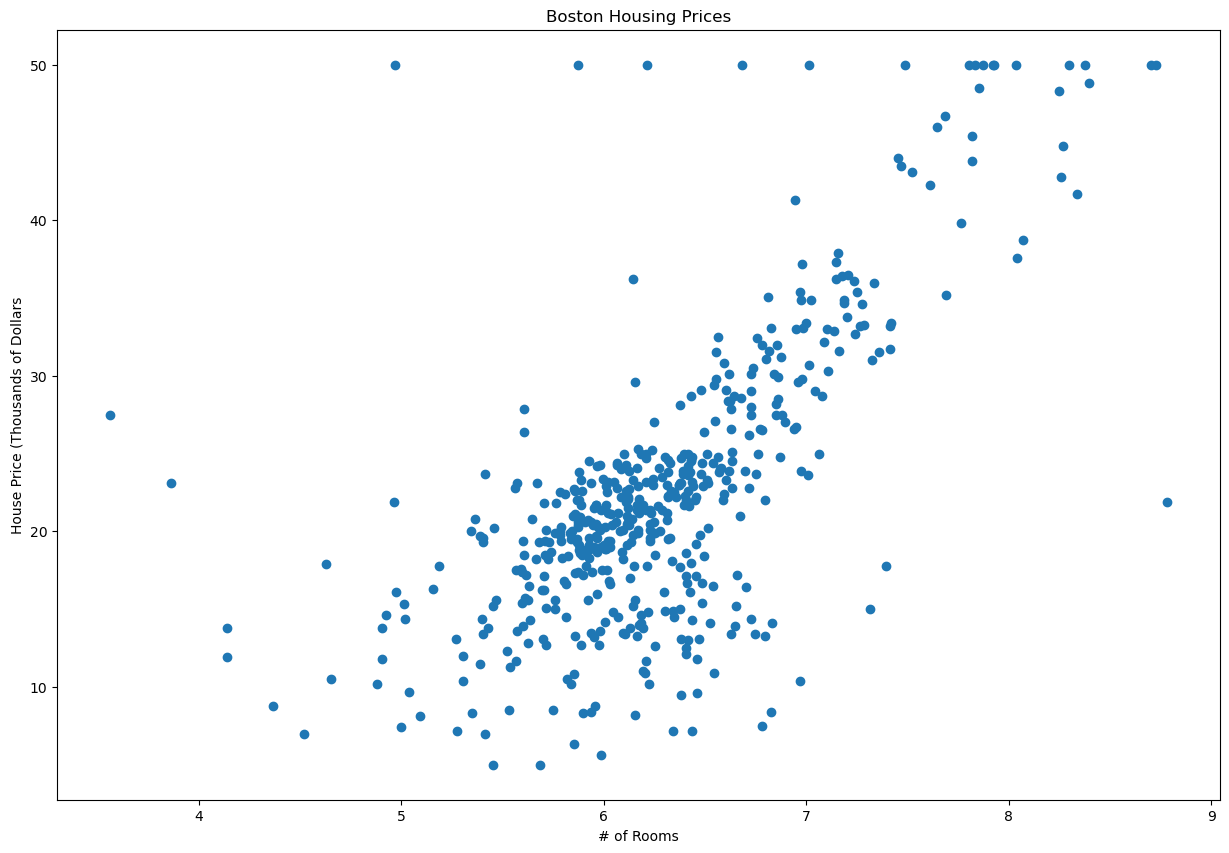

In [4]:
plt.figure(figsize=(15,10))
plt.scatter(x=df['rooms'], y=df['cmedv'])
plt.xlabel('# of Rooms')
plt.ylabel('House Price (Thousands of Dollars')
plt.title('Boston Housing Prices')
plt.show()

## Linear Regression

In [5]:
from sklearn.model_selection import train_test_split
X = np.array(df['rooms']).reshape(-1, 1)
y = np.array(df['cmedv']).reshape(-1, 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

y_train = y_train.reshape(len(y_train),)
y_test = y_test.reshape(len(y_test),)

In [7]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

Intercept: -35.558
Coefficient: 9.232
MAE = $4,413.82


<Figure size 1000x700 with 0 Axes>

Text(0.5, 0, '# of Rooms')

Text(0, 0.5, 'House Price (Thousands of Dollars)')

Text(0.5, 1.0, 'Linear Regression Prediction')

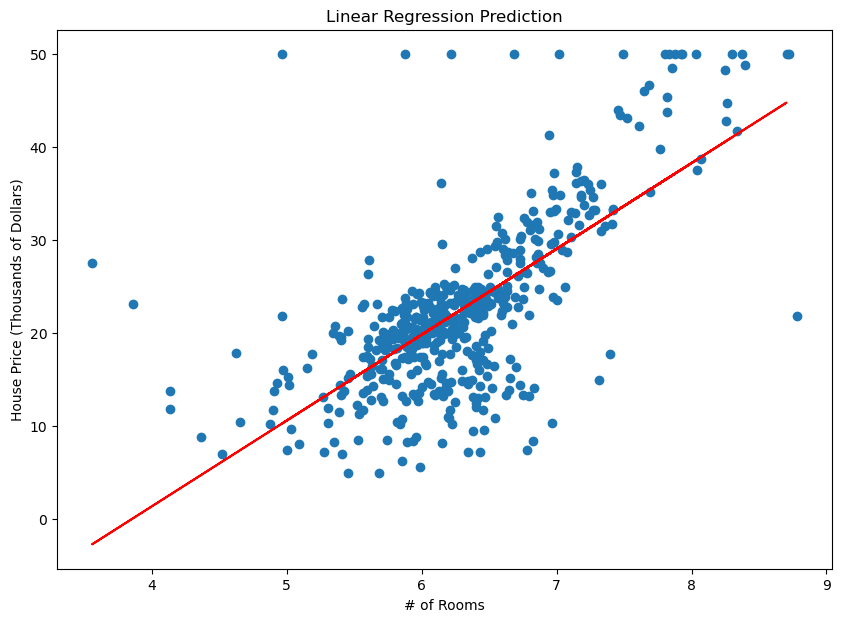

In [8]:
from sklearn.metrics import mean_absolute_error

print("Intercept: {:,.3f}".format(lm.intercept_))
print("Coefficient: {:,.3f}".format(lm.coef_[0]))

mae = mean_absolute_error(y_test, lm.predict(X_test))
print("MAE = ${:,.2f}".format(1000*mae))

plt.figure(figsize=(10,7))
plt.scatter(x=df['rooms'], y=df['cmedv'])
plt.plot(X_test, lm.predict(X_test), color='red')
plt.xlabel('# of Rooms')
plt.ylabel('House Price (Thousands of Dollars)')
plt.title('Linear Regression Prediction')
plt.show()


## SVR

In [9]:
def svr_results(y_test, X_test, fitted_svr_model):
    eps = 5
    print("C: {}".format(fitted_svr_model.C))
    print("Epsilon: {}".format(fitted_svr_model.epsilon))

    print("Intercept: {:,.3f}".format(fitted_svr_model.intercept_[0]))
    print("Coefficient: {:,.3f}".format(fitted_svr_model.coef_[0]))

    mae = mean_absolute_error(y_test, fitted_svr_model.predict(X_test))
    print("MAE = ${:,.2f}".format(1000*mae))

    perc_within_eps = 100*np.sum(y_test - fitted_svr_model.predict(X_test) < eps) / len(y_test)
    print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

    # Plot outputs
    plt.figure(figsize=(10,7))
    plt.scatter(x=df['rooms'], y=df['cmedv'])
    plt.plot(X_test, fitted_svr_model.predict(X_test), color='red')
    plt.plot(X_test, fitted_svr_model.predict(X_test)+eps, color='black')
    plt.plot(X_test, fitted_svr_model.predict(X_test)-eps, color='black')
    plt.xlabel('# of Rooms')
    plt.ylabel('House Price (Thousands of Dollars)')
    plt.title('SVR Prediction')
    plt.show()

In [10]:
from sklearn.svm import LinearSVR

eps = 5
svr = LinearSVR(epsilon=eps, C=0.01, fit_intercept=True)

In [11]:
svr.fit(X_train, y_train)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=0.01, epsilon=5)

C: 0.01
Epsilon: 5
Intercept: 0.370
Coefficient: 3.135
MAE = $5,783.73
Percentage within Epsilon = 73.53%


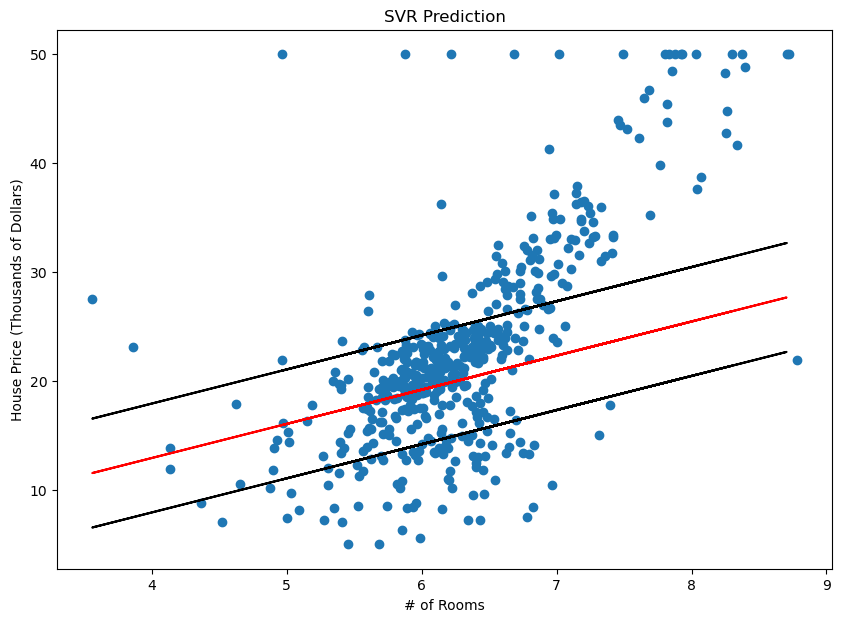

In [12]:
svr_results(y_test,X_test,svr)

## Large Penalty

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(epsilon=5)

C: 1.0
Epsilon: 5
Intercept: -10.067
Coefficient: 5.147
MAE = $4,834.15
Percentage within Epsilon = 81.37%


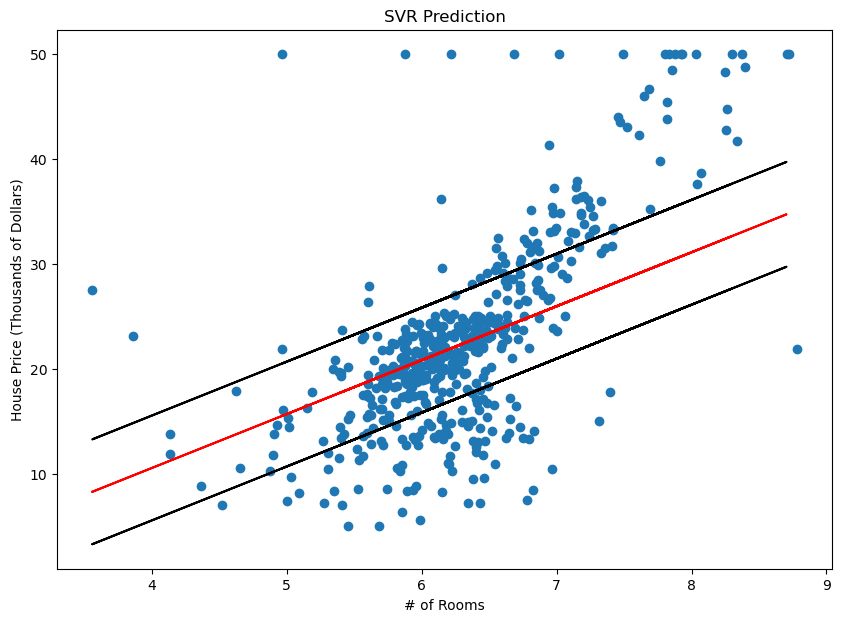

In [13]:
eps = 5
svr_high_C = LinearSVR(epsilon=eps, C=1.0, fit_intercept=True)

svr_high_C.fit(X_train, y_train)
svr_results(y_test, X_test, svr_high_C)

In [19]:
from sklearn.metrics import mean_absolute_error

test_mae_list = []
perc_within_eps_list = []

eps = 5
c_space = np.linspace(0.01, 10)

for c in c_space:
    varied_svr = LinearSVR(epsilon=eps, C=c, fit_intercept=True, max_iter=10000)
    
    varied_svr.fit(X_train, y_train)
    
    test_mae = mean_absolute_error(y_test, varied_svr.predict(X_test))
    test_mae_list.append(test_mae)
    
    perc_within_eps = 100 * np.sum(abs(y_test - varied_svr.predict(X_test)) <= eps) / len(y_test)
    perc_within_eps_list.append(perc_within_eps)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=0.01, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=0.21387755102040817, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=0.41775510204081634, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=0.6216326530612245, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=0.8255102040816327, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=1.029387755102041, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=1.233265306122449, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=1.437142857142857, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=1.6410204081632653, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=1.8448979591836736, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=2.0487755102040817, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=2.2526530612244895, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=2.4565306122448978, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=2.660408163265306, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=2.864285714285714, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=3.068163265306122, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=3.2720408163265304, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=3.4759183673469387, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=3.679795918367347, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=3.883673469387755, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=4.0875510204081635, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=4.291428571428571, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=4.495306122448979, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=4.6991836734693875, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=4.903061224489796, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=5.106938775510204, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=5.310816326530612, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=5.514693877551021, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=5.718571428571428, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=5.922448979591836, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=6.1263265306122445, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=6.330204081632653, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=6.534081632653061, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=6.737959183673469, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=6.941836734693878, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=7.145714285714286, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=7.349591836734694, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=7.553469387755102, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=7.75734693877551, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=7.961224489795918, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=8.165102040816327, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=8.368979591836734, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=8.572857142857142, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=8.77673469387755, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=8.980612244897959, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=9.184489795918367, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=9.388367346938775, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=9.592244897959183, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=9.796122448979592, epsilon=5, max_iter=10000)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=10.0, epsilon=5, max_iter=10000)

Text(0.5, 0, 'C')

Text(0, 0.5, '% within Epsilon')

Text(0, 0.5, 'Test MAE')

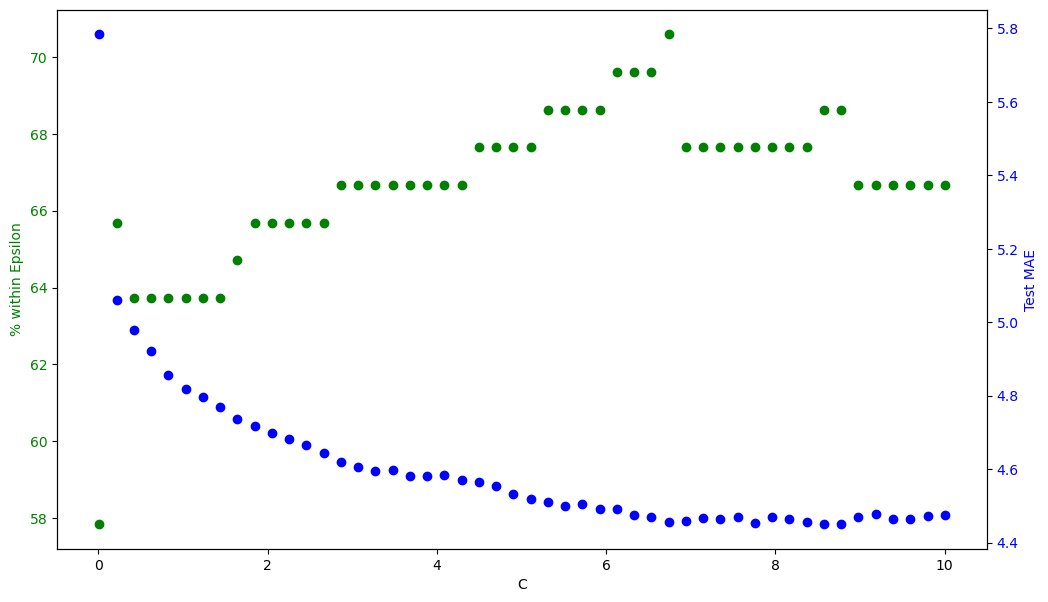

In [20]:
fig, ax1 = plt.subplots(figsize=(12,7))

color='green'
ax1.set_xlabel('C')
ax1.set_ylabel('% within Epsilon', color=color)
ax1.scatter(c_space, perc_within_eps_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

color='blue'
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Test MAE', color=color)  # we already handled the x-label with ax1
ax2.scatter(c_space, test_mae_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.show()

In [21]:
m = max(perc_within_eps_list)
inds = [i for i, j in enumerate(perc_within_eps_list) if j ==m]
C = c_space[inds[0]]

print("best C = ", C)

best C =  6.737959183673469


/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(C=6.737959183673469, epsilon=5)

C: 6.737959183673469
Epsilon: 5
Intercept: -29.998
Coefficient: 8.309
MAE = $4,462.79
Percentage within Epsilon = 85.29%


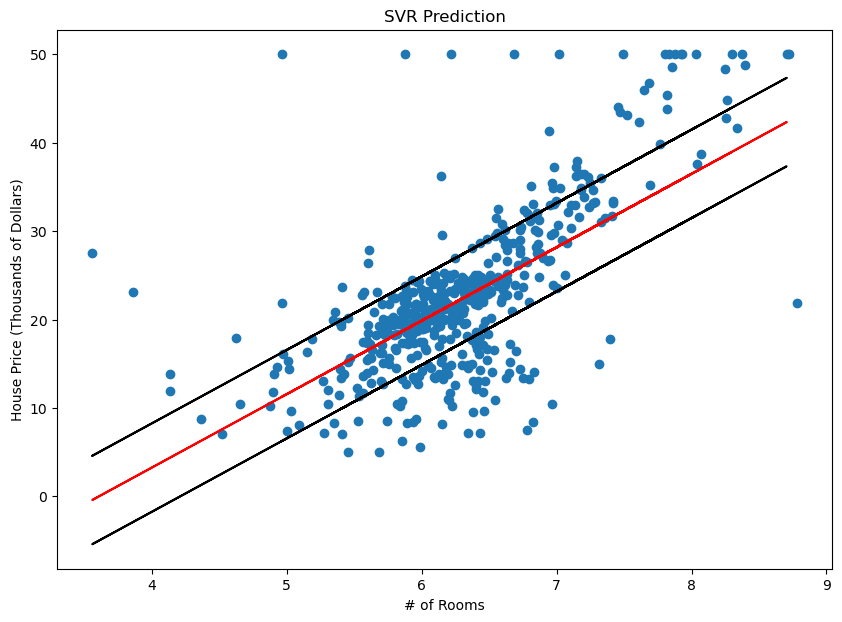

In [22]:
eps = 5
svr_best_C = LinearSVR(epsilon=eps, C=C, fit_intercept=True)
svr_best_C.fit(X_train, y_train)
svr_results(y_test, X_test, svr_best_C)

### Grid Search over C and Epsilon

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [24]:
grid = {
    'C' : np.linspace(0.01, 10),
    'epsilon' : np.linspace(0.01, 10)
}

svr_gridsearch = LinearSVR(fit_intercept=True, max_iter=10000)
grid_svr = GridSearchCV(svr_gridsearch, grid, scoring='neg_mean_absolute_error', cv=5)
grid_svr.fit(X_train, y_train)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitl

GridSearchCV(cv=5, estimator=LinearSVR(max_iter=10000),
             param_grid={'C': array([ 0.01      ,  0.21387755,  0.4177551 ,  0.62163265,  0.8255102 ,
        1.02938776,  1.23326531,  1.43714286,  1.64102041,  1.84489796,
        2.04877551,  2.25265306,  2.45653061,  2.66040816,  2.86428571,
        3.06816327,  3.27204082,  3.47591837,  3.67979592,  3.88367347,
        4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
        5.1069...
        4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
        5.10693878,  5.31081633,  5.51469388,  5.71857143,  5.92244898,
        6.12632653,  6.33020408,  6.53408163,  6.73795918,  6.94183673,
        7.14571429,  7.34959184,  7.55346939,  7.75734694,  7.96122449,
        8.16510204,  8.36897959,  8.57285714,  8.77673469,  8.98061224,
        9.1844898 ,  9.38836735,  9.5922449 ,  9.79612245, 10.        ])},
             scoring='neg_mean_absolute_error')

In [25]:
best_grid_svr_mae = grid_svr.best_estimator_
best_grid_svr_mae.fit(X_train, y_train)

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=9.592244897959183, epsilon=0.41775510204081634, max_iter=10000)

C: 9.592244897959183
Epsilon: 0.41775510204081634
Intercept: -34.238
Coefficient: 9.062
MAE = $4,411.74
Percentage within Epsilon = 87.25%


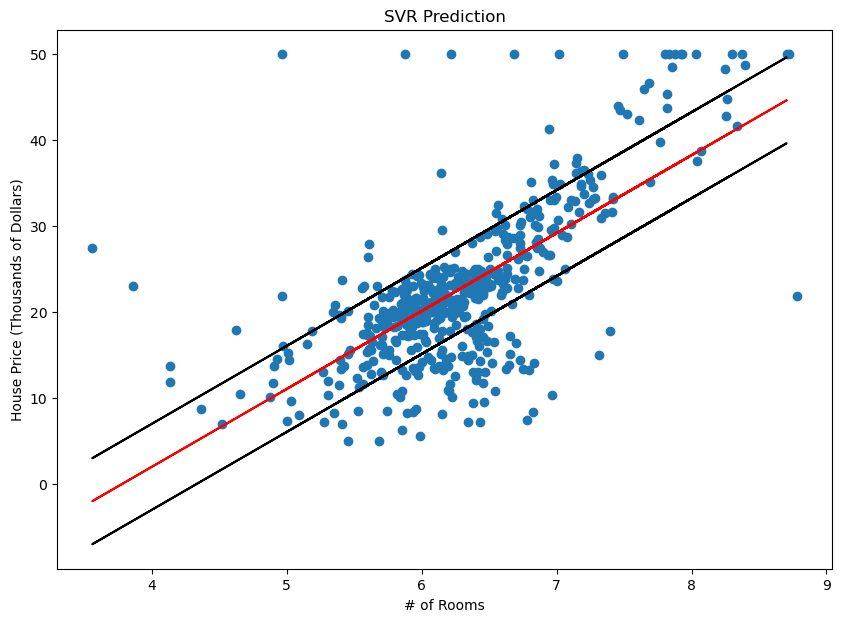

In [26]:
svr_results(y_test, X_test, best_grid_svr_mae)

In [27]:
grid = {
    'C': np.linspace(0.01, 10),
    'epsilon': np.linspace(0.01, 10)
}

svr_gridsearch =  LinearSVR(fit_intercept=True, max_iter=10000)

In [28]:
from sklearn.metrics import make_scorer

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitl

GridSearchCV(cv=5, estimator=LinearSVR(max_iter=10000),
             param_grid={'C': array([ 0.01      ,  0.21387755,  0.4177551 ,  0.62163265,  0.8255102 ,
        1.02938776,  1.23326531,  1.43714286,  1.64102041,  1.84489796,
        2.04877551,  2.25265306,  2.45653061,  2.66040816,  2.86428571,
        3.06816327,  3.27204082,  3.47591837,  3.67979592,  3.88367347,
        4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
        5.1069...
        4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
        5.10693878,  5.31081633,  5.51469388,  5.71857143,  5.92244898,
        6.12632653,  6.33020408,  6.53408163,  6.73795918,  6.94183673,
        7.14571429,  7.34959184,  7.55346939,  7.75734694,  7.96122449,
        8.16510204,  8.36897959,  8.57285714,  8.77673469,  8.98061224,
        9.1844898 ,  9.38836735,  9.5922449 ,  9.79612245, 10.        ])},
             scoring=make_scorer(frac_within_eps))

/Users/easydong/opt/anaconda3/envs/study/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(C=6.534081632653061, epsilon=0.01, max_iter=10000)

C: 6.534081632653061
Epsilon: 0.01
Intercept: -32.987
Coefficient: 8.839
MAE = $4,416.40
Percentage within Epsilon = 86.27%


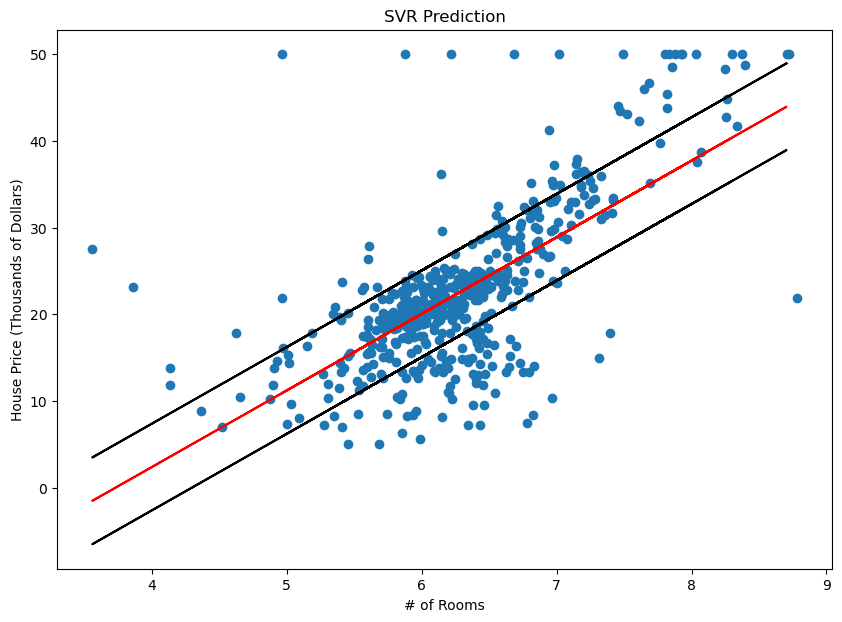

In [29]:
def frac_within_eps(y_true, y_pred):
    return np.sum(abs(y_true-y_pred) <= eps) / len(y_true)

my_scorer = make_scorer(frac_within_eps, greater_is_better=True)
grid_svr_eps = GridSearchCV(svr_gridsearch, grid, scoring=my_scorer, cv=5)
grid_svr_eps.fit(X_train, y_train)
best_grid_svr_eps = grid_svr_eps.best_estimator_
best_grid_svr_eps.fit(X_train, y_train)
svr_results(y_test, X_test, best_grid_svr_eps)